<a href="https://colab.research.google.com/github/bettytan123/Sample-Size-Calculation/blob/main/Binomal_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################################
## This script will simulate data from known statistical distributions of Binomial; then estimate GAN and sample from it
##Final edit: 2023 July 4th 5pm
## Authors: Betty and Chris, ft David
## Date created: February 2023
############################################

In [ ]:
############################################
## Installations of required modules not default available on COLAB compute software stack
############################################
! pip install sdv==0.18.0 --quiet
! pip install --upgrade scipy --quiet
! pip install sinfo --quiet
! pip install matplotlib==3.1.3 --quiet
! pip install numpy==1.24.2 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 64.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver 

In [ ]:
# Restart the runtime afterwards to solve the discrenpency error early

In [ ]:
########################
## Import dependency packages
########################

## Import SDV for GANs and sampling mechanisms, etc.
from sdv.tabular import CTGAN

## Import pandas for data structures
import pandas as pd

## Import numpy for numerical computing
import numpy as np

## Import scipy for statistical distirbution function
import scipy

## For plotting
import matplotlib.pyplot as plt

## For timing
from time import time

## Random Numbers
import random

# For progress bars
from tqdm.notebook import tqdm, trange

# Do not display warnings (bad practice)
import warnings
warnings.filterwarnings("ignore")

# For CUDA enabled/accelerated computation on the GPU
import torch

#For plot/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For take down the log in the loss plot
from io import StringIO
import sys

# Change color setting
sns.set_style('darkgrid')

In [ ]:
## Set seed of everything, the best will be to set them once and run all the notebook
np.random.seed(614)
torch.manual_seed(614)
random.seed(614)
scipy.stats.rv_continuous.random_state = 614

# Sample Size for Precision of a Binomal Proportion Random Variable --- by Mathematical Theory

In [ ]:
scipy.stats.norm.ppf(q=0.025, loc=0, scale=1)

-1.9599639845400545

In [ ]:
## Sample size by math
def samp_size_bin_ci(alpha, proportion, width):
    n = (4 * (scipy.stats.norm.ppf(q=alpha/2, loc=0, scale=1)**2) * proportion*(1-proportion) / (width**2))
    return n

In [ ]:
samp_size_bin_ci(alpha=0.05, proportion=0.2, width=0.1) ##245.8534

245.8533645244241

#Sample Size for Precision of a Binomial Proportion Random Variable --- by numerical simulation

In [ ]:
def bin_ci_samp_size(n, p, size):
    ## Generate random data
    x = np.random.binomial(n= 1, p = 0.2, size = 245)
    ## Analyze generated/simulated data
    k = np.sum(x)
    n = len(x)
    res = scipy.stats.binomtest(k=k, n =n, p=p, alternative='two-sided')

    ## Extract the estimate and CI
    mu_ll, mu_ul = res.proportion_ci(confidence_level=0.95)
    mu_hat = np.mean(x)

    # Return the estimate and the CI to the user
    # [] make it a list instead of scalar
    out = pd.DataFrame({'mean': [mu_hat],
                        'll95_mean': [mu_ll],
                        'ul95_mean': [mu_ul]})

    return(out)

In [ ]:
bin_ci_samp_size(n=1, p=0.2, size=245)

,mean,ll95_mean,ul95_mean
0,0.216327,0.166444,0.273213


In [ ]:
## Replicate above function number of simulation replicate times

# parameter available
n = int(np.ceil(samp_size_bin_ci(alpha=0.05, proportion=0.2, width=0.1)))
p = 0.2


## Number simulation replicates
n_rep = 10000

## Simulate n_rep copies of sample size trials
sim_out = []

## Loop over number simulation replicates, storing results in list
t0 = time()

for i in trange(0, n_rep):
    sim_out.append(bin_ci_samp_size(n=1, p=p, size=n))

t1 = time()
runtime = t1 - t0

### Aggregate results into dataframe
sim_df = pd.concat(sim_out)

#Calculate means of each column in the array #axis means column mean
sim_means = np.mean(sim_df, axis=0)

#Calculate the width of the confidence interval
ci_width = sim_means[2] - sim_means[1]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
## Collect the sample size simulation results into a single dataFrame
sim_results = pd.DataFrame({
    'runtime': [runtime],
    'mean_hat': [sim_means[0]],
    'mean_ll95': [sim_means[1]],
    'mean_ul95': [sim_means[2]],
    'ci_width': [ci_width]
})

sim_results

,runtime,mean_hat,mean_ll95,mean_ul95,ci_width
0,66.476654,0.200175,0.152092,0.255673,0.103581


#Sample size estimation by GAN simulation

In [ ]:
## Function to train a GAN model to simulated binormal data (with parms: p, size)
def train_gan_model_binormal(pop_n, pop_p, pop_size):
    ## Set seed of everything, ONLY FOR THE GAN
    np.random.seed(614)
    torch.manual_seed(614)
    random.seed(614)
    scipy.stats.rv_continuous.random_state = 614

    ## Simulate data as input to GAN
    x = np.random.binomial(n= pop_n, p = pop_p, size = pop_size)

    #   ## Convert vector to pandas dataFrame
    x_pd = pd.DataFrame({"x": x})

    ## Feed the simulated data into SDV and sample synthetic data from the fitted GAN
    model = CTGAN(verbose=True, epochs=2000)

    ## Fit a GAN to the simulated data from above
    model.fit(x_pd)

    ## Return the learned model
    out = [model, x_pd]

    return out

In [ ]:
######################
# Using magic function to save the log of loss plot
######################
# %%time
%%capture output

## Parameters of binormal parent distribution
p=0.2
n = 10000

## Get the learned GAN model --- after training
t0 = time()
train_gan = train_gan_model_binormal(pop_n=1, pop_p=p, pop_size=n)
t1 = time()
fit_time = t1 - t0
fit_time

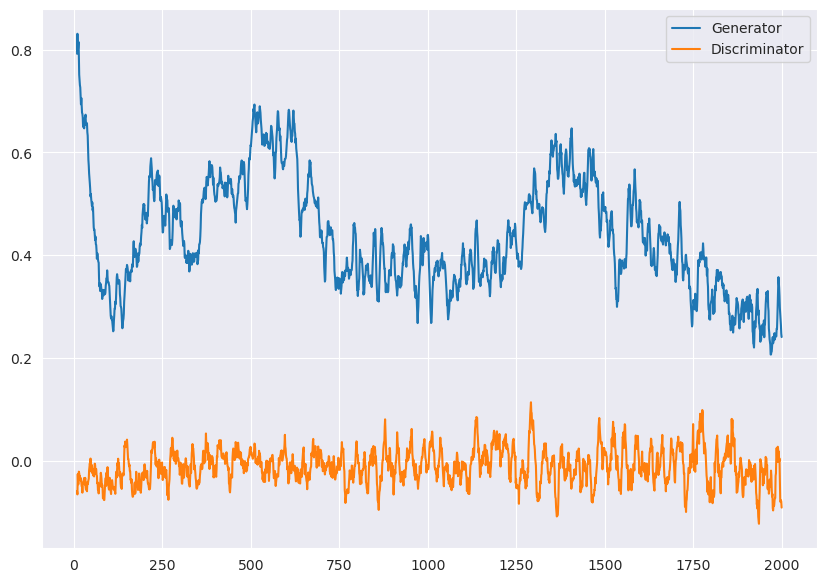

In [ ]:
logs = StringIO(str(output))
window = 10 # window size for the moving average, window=1 gets you the original series

df = pd.read_csv(logs, sep=",", names=['Epochs', 'Loss G', 'Loss D'])

# I think a regex would be better here
df['Loss G'] = df['Loss G'].apply(lambda x: float(x.split(':')[1]))
df['Loss D'] = df['Loss D'].apply(lambda x: float(x.split(':')[1]))

plt.figure(figsize=(10,7))

# Plot with a moving average so it is less noisy
plt.plot(df['Loss G'].rolling(window=window).mean(), label="Generator")
plt.plot(df['Loss D'].rolling(window=window).mean(), label="Discriminator")

plt.legend()
plt.show()

In [ ]:
model_ = train_gan[0]

In [ ]:
## Summarize moments of the "parent distribution" used to simulate the synthetic GAN data
x_parent = train_gan[1]

x_parent.describe()

,x
count,10000.000000
mean,0.201000
std,0.400768
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
## Parameter for specifying size of the simulated/synthetic data generated from the GAN
sim_n = int(np.ceil(samp_size_bin_ci(alpha=0.05, proportion=0.2, width=0.1)))
sim_n

246

In [ ]:
## Function to analyze data from the sampled model
def binorm_ci_samp_size_gan(m, sim_n):
    ## Generate random data --- sampling from the trained GAN which approximates the binomial probability generating function
    x = m.sample(num_rows=sim_n)
    ## Analyze generated/simulated data
    #k = np.sum(x).round(0).astype('int')
    k = np.sum(x)
    k = int(k)
    n = len(x)
    p = 0.2
    res = scipy.stats.binomtest(k=k, n =n, p=p, alternative='two-sided')

    ## Extract the estimate and CI
    mu_ll, mu_ul = res.proportion_ci(confidence_level=0.95)
    mu_hat = np.mean(x)

    # Return the estimate and the CI to the user
    out = pd.DataFrame({'mean': [mu_hat],
                         'll95_mean': [mu_ll],
                         'ul95_mean': [mu_ul]})
    return(out)

In [ ]:
## Replicate above function number of simulation replicate times

## Number simulation replicates
n_rep = 1000

## Simulate n_rep copies of sample size trials
gan_out = []

## Loop over number simulation replicates, storing results in list
t0 = time()

for i in trange(0, n_rep):
    gan_out.append(binorm_ci_samp_size_gan(m=model_, sim_n=sim_n))

t1 = time()
runtime = t1 - t0

## Aggregate results into dataframe
gan_df = pd.concat(gan_out)

## Calculate means of each column in the array #axis means column mean
gan_means = np.mean(gan_df, axis=0)

## Calculate the width of the confidence interval
gan_width = gan_means[2] - gan_means[1]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
## Collect results of the GAN based sample size calculations
gan_results = pd.DataFrame({
    'runtime': [runtime],
    'mean_hat': [gan_means[0]],
    'mean_ll95': [gan_means[1]],
    'mean_ul95': [gan_means[2]],
    'ci_width': [gan_width]
})

gan_results

,runtime,mean_hat,mean_ll95,mean_ul95,ci_width
0,20.645577,0.198988,0.151067,0.254323,0.103255


#Estimating sample size for a continuous CI from Binomial Proportion distribution

In [ ]:
#########################################################################
##
##
## Below we investgiate finite sample properties of three methods for estimating sample size for a continuous CI from Binomial distribution
##    1) Theory or analytic formula
##    2) Simulation (from normal probability generating model)
##    3) Simulation (from GAN approximating parent normal probability generating model)
##
##
#########################################################################

In [ ]:
###########################
## Create parameter grid
###########################
from itertools import product

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], columns=dictionary.keys())

dictionary = {'alpha': [0.05],
              'p': np.arange(0.1, 0.5, 0.1),
              'width': [0.05,0.1,0.15,0.20,0.25]}

param_df = expand_grid(dictionary)
param_df

,alpha,p,width
0,0.05,0.1,0.05
1,0.05,0.1,0.10
2,0.05,0.1,0.15
3,0.05,0.1,0.20
4,0.05,0.1,0.25
5,0.05,0.2,0.05
6,0.05,0.2,0.10
7,0.05,0.2,0.15
8,0.05,0.2,0.20
9,0.05,0.2,0.25


#Sample Size for Continuous CI by Theory or Analytic Formula

In [ ]:
#################
## 1) Sample Size for Continuous CI by Theory or Analytic Formula
#################
samp_size_theory_list = []

for i in np.arange(param_df.shape[0]):
    ## Compute sample size at particular parameter condiguration
    n = samp_size_bin_ci(alpha=param_df.loc[i, 'alpha'],
                          proportion=param_df.loc[i, 'p'],
                          width=param_df.loc[i, 'width'])
    ## Round to largest integer
    n_ = str(np.round(np.ceil(n),0))
    ## Append sample size to list
    samp_size_theory_list.append(n_)

samp_size_theory_df = pd.concat([param_df, pd.Series(samp_size_theory_list)], axis=1)
samp_size_theory_df.columns = ['alpha','p','width','n_theory']
samp_size_theory_df

,alpha,p,width,n_theory
0,0.05,0.1,0.05,554.0
1,0.05,0.1,0.10,139.0
2,0.05,0.1,0.15,62.0
3,0.05,0.1,0.20,35.0
4,0.05,0.1,0.25,23.0
5,0.05,0.2,0.05,984.0
6,0.05,0.2,0.10,246.0
7,0.05,0.2,0.15,110.0
8,0.05,0.2,0.20,62.0
9,0.05,0.2,0.25,40.0


#Sample Size for Continuous CI by Simulation from binormal Distribution

In [ ]:
def binorm_ci_samp_size(n, p, size):
    ## Generate random data
    x = np.random.binomial(n= 1, p = p, size = size)
    ## Analyze generated/simulated data
    k = np.sum(x)
    n = len(x)
    res = scipy.stats.binomtest(k=k, n =n, p=p, alternative='two-sided')

    ## Extract the estimate and CI
    mu_ll, mu_ul = res.proportion_ci(confidence_level=0.95)
    mu_hat = np.mean(x)

    # Return the estimate and the CI to the user
    # [] make it a list instead of scalar
    out = pd.DataFrame({'mean': [mu_hat],
                        'll95_mean': [mu_ll],
                        'ul95_mean': [mu_ul]})

    return(out)


In [ ]:
binorm_ci_samp_size(n=1, p=0.2, size=245)

,mean,ll95_mean,ul95_mean
0,0.195918,0.148131,0.251227


In [ ]:
##
## Replicate above function to compute expected CI width, for continuous mean, at various parm values (mu, std, n) over number sim replicated (n_rep)
##
def binorm_ci_samp_size_sim( p, size, n_rep):

    ## Simulate n_rep copies of sample size trials
    sim_out = []

    ## Loop over number simulation replicates, storing results in list
    t0 = time()

    for i in trange(0, n_rep):
        sim_out.append(binorm_ci_samp_size(n=1, p=p, size=size))

    t1 = time()
    runtime = t1 - t0

    ### Aggregate results into dataframe
    sim_df = pd.concat(sim_out)

    ## Calculate means of each column in the array
    sim_means = np.mean(sim_df, axis=0)

    ## Calculate the width of the confidence interval
    ci_width = sim_means[2] - sim_means[1]

    ## Return expect width
    return ci_width

In [ ]:
binorm_ci_samp_size_sim( p=0.2, size=245, n_rep=100)

  0%|          | 0/100 [00:00<?, ?it/s]

0.10254102476869004

In [ ]:
## Loop over theoretical table, to use simulation to understand relationship between (n, p, size, n_rep) etc.
samp_size_sim_list = []

## 1000 simulation replicates; reduces computational burden
n_rep = 10000

t0 = time()

for i in np.arange(samp_size_theory_df.shape[0]):
    ## Compute sample size at particular parameter condiguration
    ci_width = binorm_ci_samp_size_sim(size=int(float(samp_size_theory_df.loc[i, 'n_theory'])),
                          p=samp_size_theory_df.loc[i, 'p'],
                          n_rep=n_rep)
    ## Round to largest integer
    ci_width_ = str(np.round(ci_width,4))
    ## Append sample size to list
    samp_size_sim_list.append(ci_width_)

t1 = time()
sim_time = t1-t0

## Compile results into dataFrame
samp_size_sim_df = pd.concat([samp_size_theory_df, pd.Series(samp_size_sim_list)], axis=1)
samp_size_sim_df.columns = ['alpha','p','width','n_theory','ci_width_sim']
samp_size_sim_df

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

,alpha,p,width,n_theory,ci_width_sim
0,0.05,0.1,0.05,554.0,0.0516
1,0.05,0.1,0.10,139.0,0.1055
2,0.05,0.1,0.15,62.0,0.1614
3,0.05,0.1,0.20,35.0,0.2172
4,0.05,0.1,0.25,23.0,0.2714
5,0.05,0.2,0.05,984.0,0.0509
6,0.05,0.2,0.10,246.0,0.1033
7,0.05,0.2,0.15,110.0,0.156
8,0.05,0.2,0.20,62.0,0.2095
9,0.05,0.2,0.25,40.0,0.2613


In [ ]:
## Timing for the simulation experiments
sim_time

1282.293885231018

# Sample Size for Continuous CI by Generative Adversarial Network (GAN) from a (parent) Binomial Distribution

In [ ]:
## Function to train a GAN model to simulated normal data (with parms: mean, sd, n)
def train_gan_model_binormal(pop_p, pop_size):
    ## Set seed of everything
    np.random.seed(614)
    torch.manual_seed(614)
    random.seed(614)
    scipy.stats.rv_continuous.random_state = 614

    ## Simulate data as input to GAN
    x = np.random.binomial(n=1, p=pop_p, size=pop_size)

    #   ## Convert vector to pandas dataFrame
    x_pd = pd.DataFrame({"x": x})

    ## Feed the simulated data into SDV and sample synthetic data from the fitted GAN
    model = CTGAN(verbose=False, epochs=2000)

    ## Fit a GAN to the simulated data from above
    model.fit(x_pd)

    ## Return the learned model
    out = [model, x_pd]

    return out

In [ ]:
##
## Replicate above function to compute expected CI width, for continuous mean, at various parm values (mu, std, n) over number sim replicated (n_rep)
##
def binorm_ci_samp_size_gan(pop_p, pop_size, n_rep):

    ## Get the learned GAN model --- after training
    t0 = time()
    train_gan = train_gan_model_binormal(pop_p=pop_p, pop_size=pop_size)
    t1 = time()
    fit_time = t1 - t0
    #fit_time

    ## Extract learned GAN model
    model_ = train_gan[0]

    ## Function to analyze data from the sampled model
    def binorm_ci_samp_size_gan(m, pop_size):
        ## Generate random data --- sampling from the trained GAN which approximates the normal probability generating function
        x = m.sample(num_rows=pop_size)
        ## Analyze generated/simulated data
        k = np.sum(x)
        k = int(k)
        n = len(x)
        res = scipy.stats.binomtest(k=k, n =n, p=p, alternative='two-sided')

        ## Extract the estimate and CI
        mu_ll, mu_ul = res.proportion_ci(confidence_level=0.95)
        mu_hat = np.mean(x)

        # Return the estimate and the CI to the user
        out = pd.DataFrame({'mean': [mu_hat],
                         'll95_mean': [mu_ll],
                         'ul95_mean': [mu_ul]})
        return(out)

    ##
    ## Replicate above function number of simulation replicate times
    ##

    ## Simulate n_rep copies of sample size trials
    gan_out = []

    ## Loop over number simulation replicates, storing results in list
    t0 = time()

    for i in trange(0, n_rep):
        gan_out.append(binorm_ci_samp_size_gan(m=model_, pop_size=pop_size))

    t1 = time()
    gan_time = t1 - t0

    ## Aggregate results into dataframe
    gan_df = pd.concat(gan_out)

    ## Calculate means of each column in the array #axis means column mean
    gan_means = np.mean(gan_df, axis=0)

    ## Calculate the width of the confidence interval
    gan_width = gan_means[2] - gan_means[1]

    ## Return the GAN estimated CI width
    return gan_width

In [ ]:
## SAME Concern as the Normal distribution
## WARNING...notice very subtle difference between pop_n and sim_n
##
## "sim_n" should be set to size of theoretical sample size needed to obtain CI of expected width, given SD/alpha/mean
##
## "pop_n" can vary...larger values mean GAN parent dist is more likely converge in dist to population model, smaller values reduce likelihood convergence in dist
##     --- larger values can also substantially increase training time for the GAN model
##

t0 = time()

tmp = binorm_ci_samp_size_gan(pop_p=0.2, pop_size=int(np.ceil(samp_size_bin_ci(alpha=0.05, proportion=0.2, width=0.1))),
                              n_rep=1000)

t1 = time()

[tmp, t1-t0]

  0%|          | 0/1000 [00:00<?, ?it/s]

[0.10493861298273069, 42.96362042427063]

In [ ]:
## Loop over theoretical table, to use simulation to understand relationship between (n, mu, std, n_rep) etc.
samp_size_gan_list = []

## 1000 simulation replicates; reduces computational burden
n_rep = 1000

t0 = time()

for i in np.arange(samp_size_theory_df.shape[0]):
    ## Compute sample size at particular parameter condiguration
    ci_width = binorm_ci_samp_size_gan(
                      pop_p=samp_size_theory_df.loc[i, 'p'],
                      pop_size=int(float(samp_size_theory_df.loc[i, 'n_theory'])),
                      n_rep=n_rep)
    ## Round to largest integer
    ci_width_ = str(np.round(ci_width,4))
    ## Append sample size to list
    samp_size_gan_list.append(ci_width_)

t1 = time()
gan_time = t1-t0

## Compile results into dataFrame
samp_size_gan_df = pd.concat([samp_size_theory_df, pd.Series(samp_size_gan_list)], axis=1)
samp_size_gan_df.columns = ['alpha','p','width','n_theory','ci_width_gan']
samp_size_gan_df

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,alpha,p,width,n_theory,ci_width_gan
0,0.05,0.1,0.05,554.0,0.0533
1,0.05,0.1,0.10,139.0,0.1057
2,0.05,0.1,0.15,62.0,0.1693
3,0.05,0.1,0.20,35.0,0.2057
4,0.05,0.1,0.25,23.0,0.3187
5,0.05,0.2,0.05,984.0,0.0491
6,0.05,0.2,0.10,246.0,0.1049
7,0.05,0.2,0.15,110.0,0.1644
8,0.05,0.2,0.20,62.0,0.1977
9,0.05,0.2,0.25,40.0,0.2857


In [ ]:
samp_size_sim_df['ci_width_gan'] = samp_size_gan_df['ci_width_gan']
samp_size_sim_df

,alpha,p,width,n_theory,ci_width_sim,ci_width_gan
0,0.05,0.1,0.05,554.0,0.0516,0.0533
1,0.05,0.1,0.10,139.0,0.1055,0.1057
2,0.05,0.1,0.15,62.0,0.1614,0.1693
3,0.05,0.1,0.20,35.0,0.2172,0.2057
4,0.05,0.1,0.25,23.0,0.2714,0.3187
5,0.05,0.2,0.05,984.0,0.0509,0.0491
6,0.05,0.2,0.10,246.0,0.1033,0.1049
7,0.05,0.2,0.15,110.0,0.156,0.1644
8,0.05,0.2,0.20,62.0,0.2095,0.1977
9,0.05,0.2,0.25,40.0,0.2613,0.2857


In [ ]:
samp_size_sim_df

,alpha,p,width,n_theory,ci_width_sim,ci_width_gan
0,0.05,0.1,0.05,554.0,0.0516,0.0533
1,0.05,0.1,0.10,139.0,0.1055,0.1057
2,0.05,0.1,0.15,62.0,0.1614,0.1693
3,0.05,0.1,0.20,35.0,0.2172,0.2057
4,0.05,0.1,0.25,23.0,0.2714,0.3187
5,0.05,0.2,0.05,984.0,0.0509,0.0491
6,0.05,0.2,0.10,246.0,0.1033,0.1049
7,0.05,0.2,0.15,110.0,0.156,0.1644
8,0.05,0.2,0.20,62.0,0.2095,0.1977
9,0.05,0.2,0.25,40.0,0.2613,0.2857


In [ ]:
samp_size_sim_df['n_theory'] = samp_size_sim_df['n_theory'].astype(float)
samp_size_sim_df['ci_width_sim'] = samp_size_sim_df['ci_width_sim'].astype(float)
samp_size_sim_df['ci_width_gan'] = samp_size_sim_df['ci_width_gan'].astype(float)

In [ ]:
#Final table for the error rate
samp_size_sim_df['ci_theory'] = samp_size_sim_df['width']

samp_size_sim_df['relative_error_sim'] = 100 * (samp_size_sim_df['ci_theory'] - samp_size_sim_df['ci_width_sim']).abs() /  samp_size_sim_df['ci_theory']
samp_size_sim_df['relative_error_gan'] = 100 * (samp_size_sim_df['ci_theory'] - samp_size_sim_df['ci_width_gan']).abs() /  samp_size_sim_df['ci_theory']

#Final table for comparasion
samp_size_sim_df

,alpha,p,width,n_theory,ci_width_sim,ci_width_gan,ci_theory,relative_error_sim,relative_error_gan
0,0.05,0.1,0.05,554.0,0.0516,0.0533,0.05,3.200000,6.600000
1,0.05,0.1,0.10,139.0,0.1055,0.1057,0.10,5.500000,5.700000
2,0.05,0.1,0.15,62.0,0.1614,0.1693,0.15,7.600000,12.866667
3,0.05,0.1,0.20,35.0,0.2172,0.2057,0.20,8.600000,2.850000
4,0.05,0.1,0.25,23.0,0.2714,0.3187,0.25,8.560000,27.480000
5,0.05,0.2,0.05,984.0,0.0509,0.0491,0.05,1.800000,1.800000
6,0.05,0.2,0.10,246.0,0.1033,0.1049,0.10,3.300000,4.900000
7,0.05,0.2,0.15,110.0,0.1560,0.1644,0.15,4.000000,9.600000
8,0.05,0.2,0.20,62.0,0.2095,0.1977,0.20,4.750000,1.150000
9,0.05,0.2,0.25,40.0,0.2613,0.2857,0.25,4.520000,14.280000


In [ ]:
#gan_time

In [ ]:
##############################################
##
## Properties/info on the Jupyter Notebook session
##
#############################################

In [ ]:
## Date/time
from datetime import datetime
str(datetime.today()).split()[0]

In [ ]:
## Session Info
from sinfo import sinfo
sinfo()

In [ ]:
## Jupyter version
!jupyter --version

In [ ]:
## Python version
!python --version